In [196]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [192]:
#Importing the dataset
hr=pd.read_csv("HR Analytics.csv")

In [199]:
hr.head() # The head() gives the first 5 rows of the dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [198]:
hr.info() #The info() method prints information about the DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           8089 non-null   int64  
 1   department            8089 non-null   object 
 2   region                8089 non-null   object 
 3   education             7734 non-null   object 
 4   gender                8089 non-null   object 
 5   recruitment_channel   8089 non-null   object 
 6   no_of_trainings       8089 non-null   int64  
 7   age                   8089 non-null   int64  
 8   previous_year_rating  7496 non-null   float64
 9   length_of_service     8089 non-null   int64  
 10  awards_won?           8089 non-null   int64  
 11  avg_training_score    8089 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 758.5+ KB


There are a few columns that have the datatype as 'object' which are strings. There are also missing values in the column 'education' and 'previous_year_rating'. We will need to handle column types and missing values in data cleaning.

# DATA CLEANING

## 1.Handling Missing Values

In [200]:
hr.isnull().sum()

employee_id               0
department                0
region                    0
education               355
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    593
length_of_service         0
awards_won?               0
avg_training_score        0
dtype: int64

- The isnull() command will go through each and every record in the data frame and will give a boolean value which represents 'False' for no null and 'True' for null.
- The .sum() will count the number of true values in each feature and will give the sum of the number of Trues which rerpesernt the null values in the data frame.

In [28]:
#Total number of missing values in 'Education' column
hr.education.isnull().sum()

355

This shows the total number of null values only in the 'Education' column.

In [29]:
def fill_missing(df, column, value):
    df_copy = df.copy()
    df_copy[column].fillna(value=value,inplace=True)
    return df_copy

hr = fill_missing(hr, "education", "others")
hr = fill_missing(hr, "previous_year_rating", 1.0)

In [30]:
hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

Here, we have replaced the null values separately for the 'Education' and 'Previous Year Training' column.

## 2. Converting 'object' columns into categorical


In [32]:
hr.department.value_counts()

Sales & Marketing    2486
Operations           1618
Procurement          1079
Technology           1029
Analytics             800
HR                    390
Finance               386
Legal                 158
R&D                   143
Name: department, dtype: int64

In [33]:
hr.education.value_counts()

Bachelor's          5352
Master's & above    2258
others               355
Below Secondary      124
Name: education, dtype: int64

In [34]:
hr.gender.value_counts()

m    5736
f    2353
Name: gender, dtype: int64

In [35]:
hr.recruitment_channel.value_counts()

other       4524
sourcing    3426
referred     139
Name: recruitment_channel, dtype: int64

In [36]:
#Converted 'object' columns into categorical datatype.
def convert_to_category(df, column_list):
    df_copy = df.copy()
    df_copy[column_list] = df_copy[column_list].apply(lambda x: x.astype('category'))
    return df_copy

hr = convert_to_category(hr, ['department','region','education','gender','recruitment_channel'])

In [77]:
hr.duplicated()  #It checks for the duplicates rows and returns as True and False.

0       False
1       False
2       False
3       False
4       False
        ...  
8084    False
8085    False
8086    False
8087    False
8088    False
Length: 8089, dtype: bool

In [78]:
hr.duplicated().sum() #Method sum() along with it, will return the total number of the duplicates in the dataset.

3

In [80]:
hr.drop_duplicates() #Removing the entire duplicates rows values.

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,1.0,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...
8084,Operations,region_22,Bachelor's,m,sourcing,1,29,4.0,2,0,61
8085,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,34,3.0,7,0,51
8086,Finance,region_2,others,f,sourcing,1,38,3.0,3,0,59
8087,Analytics,region_22,Bachelor's,f,other,2,27,5.0,3,0,76


# UNIVARIATE ANANLYSIS

**The term univariate analysis refers to the analysis of one variable.'Uni' means one, hence, *Univariate analysis* refers to the analysis of one variable.**

In [197]:
hr.describe() # Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame.

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,8089.000000,8089.000000,8089.000000,7496.000000,8089.000000,8089.000000,8089.000000
mean,38759.573495,1.250958,34.866362,3.334312,5.830511,0.022871,63.300284
std,22592.060766,0.589279,7.702978,1.267662,4.192845,0.149500,13.444144
min,13.000000,1.000000,20.000000,1.000000,1.000000,0.000000,40.000000
25%,19212.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38705.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58070.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,8.000000,60.000000,5.000000,33.000000,1.000000,99.000000


In [40]:
# Remove column 'employee_id' from the dataframe
hr.drop(columns='employee_id',inplace=True)  

#### HISTOGRAM

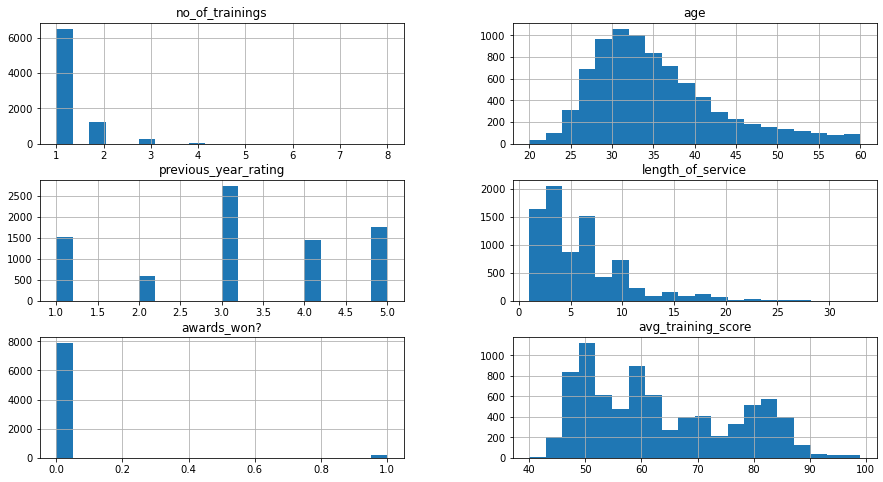

In [41]:
# Histograms of all numerical columns
hr.hist(bins=20, figsize=(15,8))
plt.show()

#### BAR PLOT

In [42]:
hr.education.value_counts()

Bachelor's          5352
Master's & above    2258
others               355
Below Secondary      124
Name: education, dtype: int64

In [44]:
hr.education.value_counts(normalize=True)

Bachelor's          0.661639
Master's & above    0.279145
others              0.043887
Below Secondary     0.015329
Name: education, dtype: float64

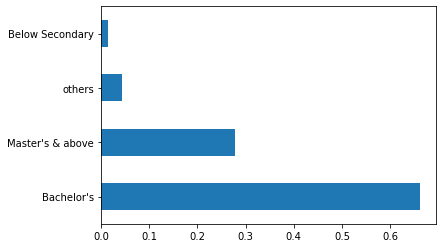

In [47]:
hr.education.value_counts(normalize=True).plot.barh()
plt.show()

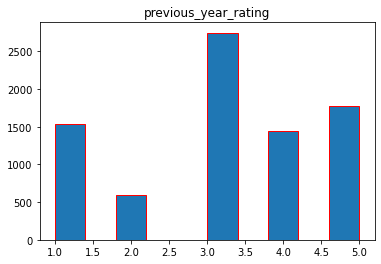

In [88]:
hr.hist(column='previous_year_rating', grid=False, edgecolor='red') 
plt.show()
#hist plot used to summarize discrete or continuous data that are measured on an interval scale.

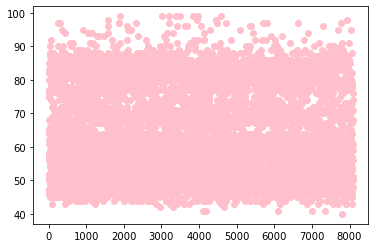

In [73]:
plt.scatter(hr.index,hr['avg_training_score'],color='pink')
plt.show()

#### PIE PLOT

In [50]:
hr.department.value_counts()

Sales & Marketing    2486
Operations           1618
Procurement          1079
Technology           1029
Analytics             800
HR                    390
Finance               386
Legal                 158
R&D                   143
Name: department, dtype: int64

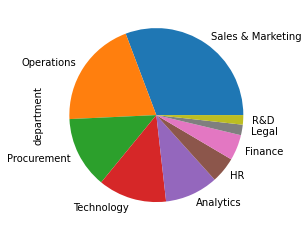

In [54]:
hr.department.value_counts().plot.pie()
plt.show()

#### KERNEL DENSITY PLOT

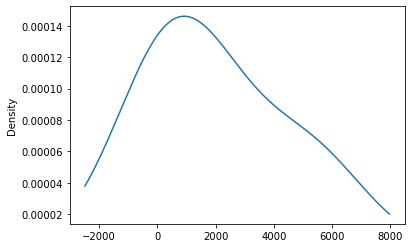

In [59]:
hr.education.value_counts().plot.kde()
plt.show()

#### STRIP PLOT

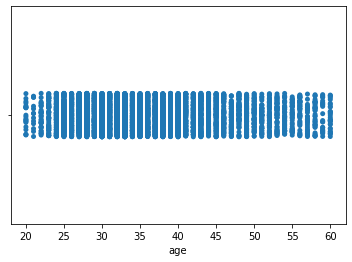

In [66]:
sns.stripplot(x=hr["age"]);

#### BOX PLOT

<AxesSubplot:>

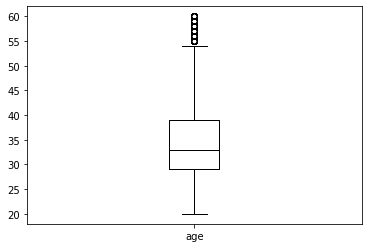

In [86]:
hr.boxplot(column=['age'], grid=False, color='black')

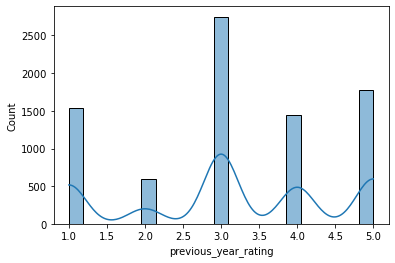

In [91]:
sns.histplot(x='previous_year_rating', data=hr, kde=True)
plt.show()                                               #hist+Kdeplot

#### JOINT PLOT

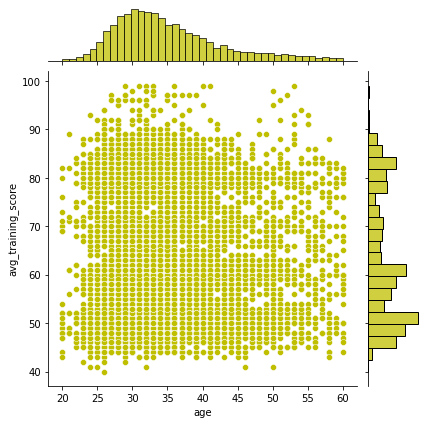

In [122]:
sns.jointplot(y='avg_training_score',x='age',data=hr,color='y')
plt.show()

# BIVARIATE ANALYSIS

### Numerical - Numerical 
- Scatter Plot, Pair Plot, Heatmap

#### SCATTER PLOT

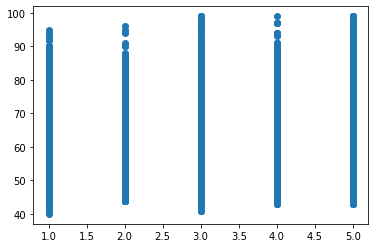

In [92]:
plt.scatter(hr.previous_year_rating, hr.avg_training_score)
plt.show()

#### PAIR PLOT

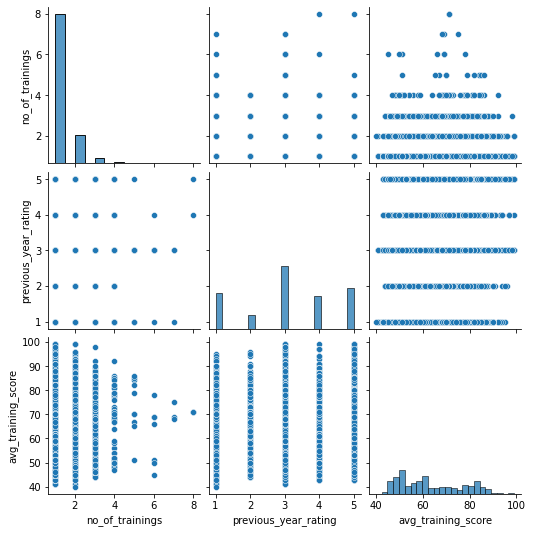

In [93]:
sns.pairplot(data=hr, vars=["no_of_trainings", "previous_year_rating", "avg_training_score"])
plt.show()

### Quantify Using Correlation Values

In [97]:
hr[["age", "length_of_service", "avg_training_score"]].corr()

,age,length_of_service,avg_training_score
age,1.000000,0.636578,-0.017890
length_of_service,0.636578,1.000000,-0.021621
avg_training_score,-0.017890,-0.021621,1.000000


### *Correlation Heatmap*
- Heatmap is used to show the corrleation between the columns this is very usefull for regression problems as one of the assumptions of linear model is that the features should not have correlation.

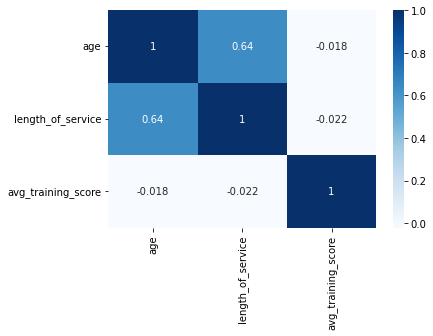

In [100]:
sns.heatmap(hr[["age", "length_of_service", "avg_training_score"]].corr(), annot=True, cmap='Blues')
plt.show()

### Numerical - Categorical

#### BAR PLOT

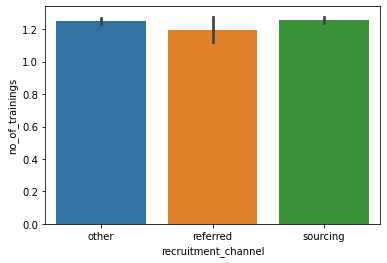

In [107]:
sns.barplot(x='recruitment_channel',y='no_of_trainings',data=hr)
plt.show()

#### BOX PLOT

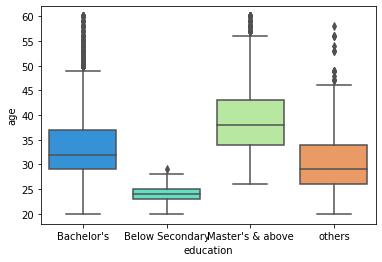

In [104]:
sns.boxplot(x='education',y='age',data=hr, palette='rainbow')
plt.show()

- The coloured region in all the categories represent the 'Inter Quartile Range' which is calculated by (Q3-Q1). This represents the range where most of the data is distributed

### Categorical - Categorical

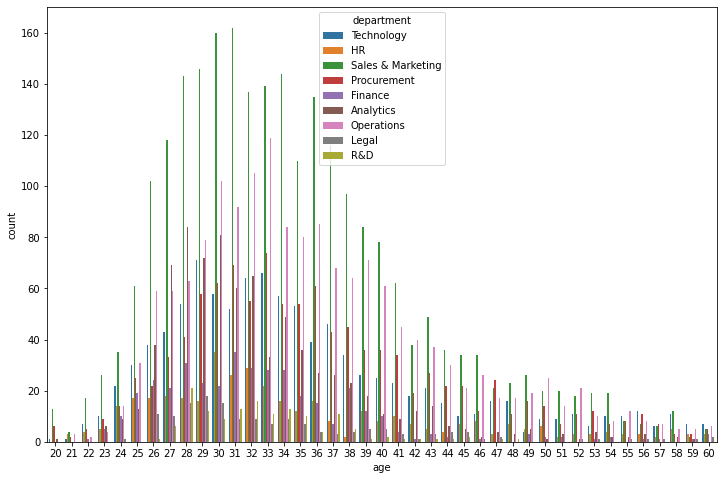

In [127]:
plt.figure(figsize=(12,8))
sns.countplot(hr['age'],hue=hr['department'])
plt.show()

- Regardless of the age, most employees work in the Sales and Marketing department.

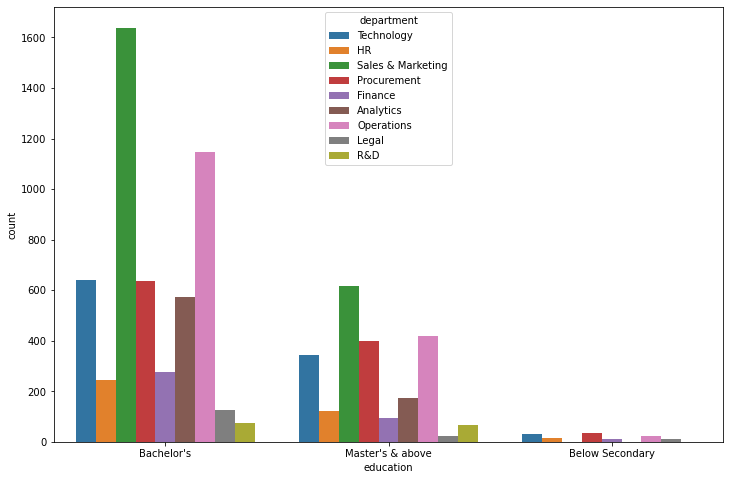

In [128]:
plt.figure(figsize=(12,8))
sns.countplot(hr['education'],hue=hr['department'])
plt.show()

- Most of the employees have the Bachelor's degree.
- Also, suprisingly most of them are from the Sales and Marketing department.

## STATISTICAL ANALYSIS

## Central Limit Theorem
#The Central Limit Theorem(CLT) states that for any data, provided a high number of samples have been taken.
- Sampling Distribution Mean(uₓ-) = Population Mean(u)
- Sampling distribution’s standard deviation (Standard error) = sigma/sq.root(n) ~S/sq.root(n)
- For n > 30, the sampling distribution becomes a normal distribution.

In [131]:
hr.shape

(8089, 12)

In [136]:
#Extracting the age column from the dataset
df = df[['age']]
df

,age
0,24
7,36
8,51
9,29
13,37
...,...
8060,23
8062,39
8080,56
8087,27


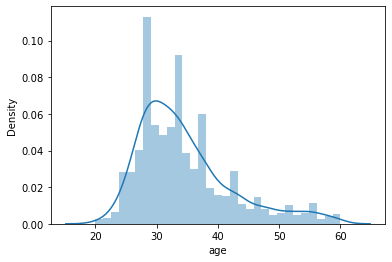

In [140]:
# Plotting the distribution graph using Seaborn Library
sns.distplot(df.age) 
plt.show()

In [142]:
#Mean of the age column
df.age.mean()

34.50545454545455

This is the true mean weight of the population. This is the population parameter.

In [143]:
# Standard deviation of the age column
df.age.std()

7.715973530259125

In [161]:
# Taking a sample size of 30
samp_size = 30

In [162]:
#Mean of the sample taken 
df.age.sample(samp_size).mean()

35.8

This is different from the population mean.
We'll check with another sample.

In [163]:
df.age.sample(samp_size).mean()

37.86666666666667

- This too came out to be different.
- Each time we take a sample, our mean value is different. There is variability in the sample mean itself.We'll assess this.
- We'll take many samples from the data, and plot a histogram of the same.

In [164]:
## Creating multiple number of samples and calculating their mean
sample_means = [df.age.sample(samp_size).mean() for i in range(1000)]
## Storing the mean values in a Series using Pandas
sample_means = pd.Series(sample_means)

In [165]:
## Verifying the total number of samples collected
len(sample_means)

1000

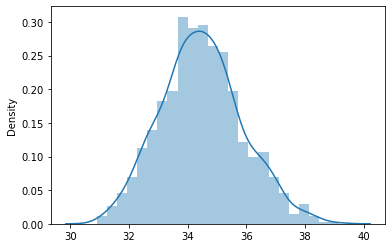

In [166]:
# Plotting the density for the sample means.
sns.distplot(sample_means)
plt.show()

In [167]:
# Mean value of all the 1000 Samples
sample_means.mean()

34.47149999999998

This is approximately same as the parent mean.

In [168]:
# Standard Deviation of all the 1000 Samples
sample_means.std()

1.3918003418324265

#### Population std vs. std of sampling mean

In [169]:
df.age.std()/np.sqrt(samp_size)

1.4087375852118977

### Effect of sample size

In [170]:
sample_sizes = [3, 10, 30, 50, 100, 200]

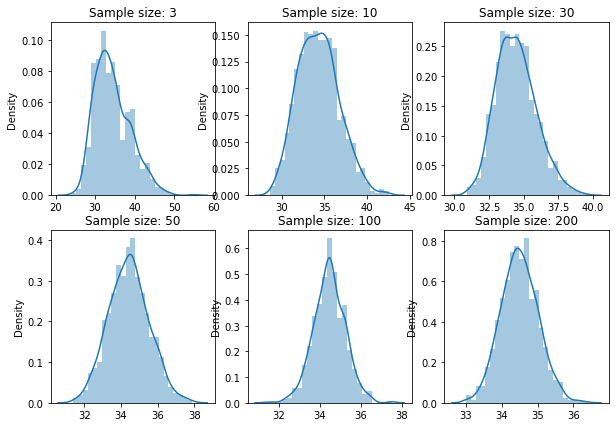

In [175]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df.age.sample(samp_size).mean() for i in range(1000)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

- From the above graphs, we can say that, when the sample size is small, the resultant sampling distribution is far from normal. But as the sample size increases, the sampling distribution gets normal. Hence, we should consider atleast 30 samples from the population to compute sample means to build the sampling distribution.


- Also, for n > 30, the sampling distribution becomes a normal distribution.